# Muskit real time singing voice synthesis demonstration

This notebook provides a demonstration of the realtime singing voice synthesis using Muskits and Hifi-GAN.

- Muskits: https://github.com/SJTMusicTeam/Muskits
- ParallelWaveGAN: https://github.com/kan-bayashi/ParallelWaveGAN

Author: Jiatong Shi ([@ftshijt](https://github.com/ftshijt))

In [1]:
# install minimal components
!pip install -q parallel_wavegan==0.5.4
!pip install --upgrade --no-cache-dir gdown
!git clone -q https://github.com/SJTMusicTeam/Muskits.git
%cd Muskits
!python setup.py install

import site
site.main()

# add local directory for muskit installation
import os, sys
sys.path.append(os.getcwd())

     |████████████████████████████████| 68 kB 2.4 MB/s 
     |████████████████████████████████| 125 kB 10.8 MB/s 
     |████████████████████████████████| 596 kB 48.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.3.1-py3-none-any.whl size=14493 sha256=703d63c7d22ad86b1048aa62b49ad29ca4b752388add1d63aa727da1f2ddca47
  Stored in directory: /tmp/pip-ephem-wheel-cache-l4p4_voo/wheels/39/13/56/88209f07bace2c1af0614ee3326de4a00aad74afb0f4be921d
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.2.1
    Uninstalling gdown-4.2.1:
      Successfully uninstalled gdown-4.2.1
/content/Muskits
     |████████████████████████████████| 15.7 MB 4.6 MB/s 
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:791: UserWarning: Module numpy was already imported from /usr/local/lib/python3.7/dist-packages/numpy/__init__.py, but /co



---
## Madarin demo

In [5]:
# download pretrained model

import os
if not os.path.exists("downloads/zh/muskit"):
    !./utils/download_from_google_drive.sh \
        https://drive.google.com/open?id=1lIuqmiZ392AbmVF39lKoBWfFcr0ArdAr downloads/zh/muskit zip
    !ln -sf downloads/zh/muskit/exp .

# set path
config_path = "downloads/zh/muskit/exp/rnn/config.yaml"
model_path = "downloads/zh/muskit/exp/rnn/33epoch.pth"
print("sucessfully finished download.")

Downloading...
From: https://drive.google.com/uc?id=1lIuqmiZ392AbmVF39lKoBWfFcr0ArdAr
To: /content/Muskits/downloads/zh/muskit/mh4Dr1.zip
100% 275M/275M [00:01<00:00, 181MB/s]
Archive:  downloads/zh/muskit/mh4Dr1.zip
replace downloads/zh/muskit/meta.yaml? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: downloads/zh/muskit/meta.yaml  
replace downloads/zh/muskit/exp/rnn/config.yaml? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: downloads/zh/muskit/exp/rnn/config.yaml  
replace downloads/zh/muskit/exp/rnn/33epoch.pth? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: downloads/zh/muskit/exp/rnn/33epoch.pth  y

replace downloads/zh/muskit/exp/rnn/images/backward_time.png? [y]es, [n]o, [A]ll, [N]one, [r]ename:  extracting: downloads/zh/muskit/exp/rnn/images/backward_time.png  
replace downloads/zh/muskit/exp/rnn/images/loss.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: downloads/zh/muskit/exp/rnn/images/loss.png  
replace downloads/zh/muskit/exp/rnn/images/forwar

In [3]:
# download pretrained model
import os
if not os.path.exists("downloads/zh/pwg"):
    !./utils/download_from_google_drive.sh \
        https://drive.google.com/open?id=1khjnA7P-5gwmmeNsS21pgifYMnzCsIJx downloads/zh/pwg zip
    
    vocoder_config = "downloads/zh/pwg/config.yml"
    vocoder_checkpoint = "downloads/zh/pwg/checkpoint-250000steps.pkl"
    print("successfully finished download vocoder")

Downloading...
From: https://drive.google.com/uc?id=1khjnA7P-5gwmmeNsS21pgifYMnzCsIJx
To: /content/Muskits/downloads/zh/pwg/PotM3Z.zip
100% 916M/916M [00:07<00:00, 124MB/s]
Archive:  downloads/zh/pwg/PotM3Z.zip
  inflating: downloads/zh/pwg/checkpoint-250000steps.pkl  
  inflating: downloads/zh/pwg/config.yml  
  inflating: downloads/zh/pwg/events.out.tfevents.1645122974.u114061  
  inflating: downloads/zh/pwg/stats.h5  
Successfully downloaded zip file from https://drive.google.com/open?id=1khjnA7P-5gwmmeNsS21pgifYMnzCsIJx
successfully finished download vocoder


In [6]:

from muskit.bin.svs_inference import SingingGenerate

sing_generation = SingingGenerate(
    train_config=config_path,
    model_file=model_path,
    vocoder_config=vocoder_config,
    vocoder_checkpoint = vocoder_checkpoint
)

In [7]:
!pip install visual_midi

     |████████████████████████████████| 5.6 MB 5.2 MB/s 
  Created wheel for pretty-midi: filename=pretty_midi-0.2.9-py3-none-any.whl size=5591955 sha256=b02fff24ed205dcb322ec14f421556f4fc5806d640b505b1ff296970e3507083
  Stored in directory: /root/.cache/pip/wheels/ad/74/7c/a06473ca8dcb63efb98c1e67667ce39d52100f837835ea18fa
Successfully built pretty-midi


Cloning into 'svs_demo'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 21 (delta 2), reused 20 (delta 1), pack-reused 0
Unpacking objects: 100% (21/21), done.


duration: 0.000 0.090 y 0.090 0.232 v 0.232 0.263 l 0.263 0.392 in 0.392 0.555 sh 0.555 0.755 i 0.755 0.792 l 0.792 0.917 e 0.917 0.991 SP 0.991 1.031 t 1.031 1.272 ian 1.272 1.343 k 1.343 1.774 ong 1.774 1.986 AP 1.986 2.064 h 2.064 2.288 ui 2.288 2.315 d 2.315 2.404 e 2.404 2.526 SP 2.526 2.619 g 2.619 2.779 eng 2.779 2.845 j 2.845 3.281 iang 3.281 3.352 j 3.352 3.756 iu 3.756 4.092 AP



/content/Muskits/muskit/svs/feats_extract/score_feats_extract.py:115: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  olens = (input_lengths - self.win_length) // self.hop_length + 1


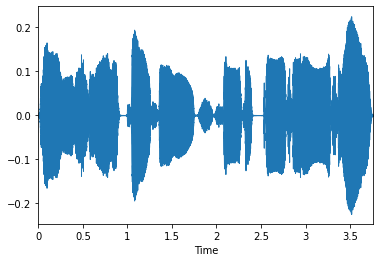

duration: 0.000 0.104 x 0.104 0.273 iang 0.273 0.368 x 0.368 0.573 in 0.573 0.639 w 0.639 0.841 o 0.841 1.037 SP 1.037 1.077 p 1.077 1.179 o 1.179 1.287 x 1.287 1.504 iao 1.504 1.580 h 1.580 1.793 ui 1.793 1.955 AP 1.955 2.000 k 2.000 2.129 ua 2.129 2.224 sh 2.224 2.422 an 2.422 2.499 h 2.499 2.694 ai 2.694 3.486 ai 3.486 3.821 AP 3.821 3.860 zh 3.860 4.020 un 4.020 4.139 sh 4.139 4.354 i 4.354 4.450 d 4.450 4.688 ao 4.688 4.845 l 4.845 6.182 ai



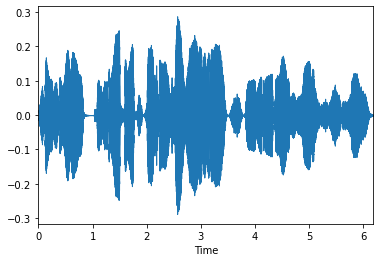

duration: 0.000 0.142 x 0.142 0.402 iao 0.402 0.480 j 0.480 0.728 iu 0.728 0.830 w 0.830 0.997 o 0.997 1.093 ch 1.093 1.376 ang 1.376 1.695 ang 1.695 1.753 j 1.753 2.021 ie 2.021 2.236 ie 2.236 2.371 m 2.371 2.664 ao 2.664 2.908 AP 2.908 3.014 m 3.014 3.283 i 3.283 3.414 r 3.414 3.620 en 3.620 3.650 d 3.650 3.903 e 3.903 4.012 w 4.012 4.234 u 4.234 4.278 k 4.278 4.499 e 4.499 4.589 j 4.589 4.826 iu 4.826 4.887 y 4.887 5.104 ao



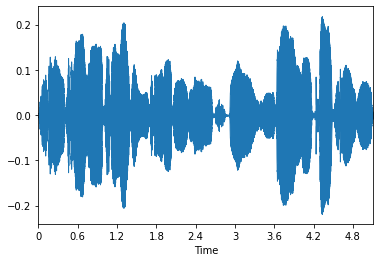

In [31]:
!rm -rf svs_demo
!git clone https://github.com/SJTMusicTeam/svs_demo.git


import torch
import pandas as pd
import numpy as np
import soundfile
import miditoolkit
from muskit.fileio.utils import midi_to_seq
import librosa.display
from IPython.display import display, Audio
import matplotlib.pyplot as plt

# for midi visualization
from visual_midi import Plotter
from visual_midi import Preset
from pretty_midi import PrettyMIDI

def read_label(label_str):
  line = label_str.strip().split()
  label_info = []
  for i in range(len(line) // 3):
    label_info.append(
        [line[i * 3], line[i * 3 + 1], line[i * 3 + 2]]
      )
  seq_len = len(label_info)
  sample_time = np.zeros((seq_len, 2))
  sample_label = []
  for i in range(seq_len):
    sample_time[i, 0] = np.float32(label_info[i][0])
    sample_time[i, 1] = np.float32(label_info[i][1])
    sample_label.append(label_info[i][2])
  return sample_time, sample_label

def tensorify(batch):
  for key in batch:
    batch[key] = torch.tensor(batch[key])
  return batch


egs = pd.read_csv("svs_demo/opencpop/egs.csv")
for index, row in egs.iterrows():
  preset = Preset(plot_width=850)
  plotter = Plotter(preset, plot_max_length_bar=4)
  pm = PrettyMIDI("{}".format(row["music_score"]))
  plotter.show_notebook(pm)

  duration_info = open(row["duration"], "r", encoding="utf-8")
  duration_info = duration_info.read()
  print("duration: {}".format(duration_info))

  midi_obj = miditoolkit.midi.parser.MidiFile(row["music_score"])
  music_score = midi_to_seq(
                midi_obj, np.int16, sing_generation.fs, 0, 1.0, "format", 0
            )
 
  info = {
      "label": read_label(duration_info),
      "midi": music_score,
      "text": row["text"]
  }

  batch = sing_generation.preprocess_fn(str(row["id"]), info, 1.0)
  batch = tensorify(batch)
  singing, _, _, _, _, _, _ = sing_generation(**batch)
  
  # let us listen to samples
  display(Audio(singing, rate=sing_generation.fs))
  librosa.display.waveplot(singing.cpu().numpy(), sr=sing_generation.fs)
  plt.show()
